In [65]:
import pandas as pd
data_user = pd.read_csv('yelp_academic_dataset_user.csv')
data_user.head()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,compliments_profile,compliments_writer,elite,fans,friends,name,review_count,type,user_id,votes_cool,votes_funny,votes_useful,yelping_since
0,4.14,78,15,11,48,NaN,3,20,15,25,8,9,"[2005, 2006]",69,"[u'rpOyqD_893cqmDAtJLbdog', u'4U9kSBLuBDU391x6...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,245,166,278,2004-10
1,3.64,1521,209,561,1032,37,129,589,287,921,110,290,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[u'18kPq7GPye-YQ3LyKyAZPw', u'4U9kSBLuBDU391x6...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,9837,6849,12642,2004-10
2,3.59,145,23,122,102,4,19,82,23,86,9,24,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[u'18kPq7GPye-YQ3LyKyAZPw', u'rpOyqD_893cqmDAt...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,727,907,1445,2004-10
3,4.64,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2,"[u'18kPq7GPye-YQ3LyKyAZPw', u'rpOyqD_893cqmDAt...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,5,1,11,2004-10
4,3.80,1,2,NaN,1,NaN,1,1,NaN,2,NaN,2,[2005],3,"[u'rpOyqD_893cqmDAtJLbdog', u'HDQixQ-WZEV0LVPJ...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,11,10,34,2004-10


In [66]:
data_user.dtypes

average_stars          float64
compliments_cool       float64
compliments_cute       float64
compliments_funny      float64
compliments_hot        float64
compliments_list       float64
compliments_more       float64
compliments_note       float64
compliments_photos     float64
compliments_plain      float64
compliments_profile    float64
compliments_writer     float64
elite                   object
fans                     int64
friends                 object
name                    object
review_count             int64
type                    object
user_id                 object
votes_cool               int64
votes_funny              int64
votes_useful             int64
yelping_since           object
dtype: object

In [67]:
#fans friends
#avg_stars fans friends
#fans compliments_cool votes_cool
#fans compliments_funny votes_funny
#fans votes_useful
#friends votes_useful
#friends compliments_cool votes_cool
#friends compliments_funny votes_funny

In [68]:
#read in business table and extract list of userids for las vegas businesses
##reading in business data set
#looking at descriptives
csv ='yelp_academic_dataset_business.csv'
business=pd.read_csv(csv)
business.head()
business.describe()
business.columns

Index([u'attributes_Accepts Credit Cards', u'attributes_Accepts Insurance', u'attributes_Ages Allowed', u'attributes_Alcohol', u'attributes_Ambience', u'attributes_Attire', u'attributes_BYOB', u'attributes_BYOB/Corkage', u'attributes_By Appointment Only', u'attributes_Caters', u'attributes_Coat Check', u'attributes_Corkage', u'attributes_Delivery', u'attributes_Dietary Restrictions', u'attributes_Dogs Allowed', u'attributes_Drive-Thru', u'attributes_Good For', u'attributes_Good For Dancing', u'attributes_Good For Groups', u'attributes_Good For Kids', u'attributes_Good for Kids', u'attributes_Hair Types Specialized In', u'attributes_Happy Hour', u'attributes_Has TV', u'attributes_Music', u'attributes_Noise Level', u'attributes_Open 24 Hours', u'attributes_Order at Counter', u'attributes_Outdoor Seating', u'attributes_Parking', u'attributes_Payment Types', u'attributes_Price Range', u'attributes_Smoking', u'attributes_Take-out', u'attributes_Takes Reservations', u'attributes_Waiter Servi

In [69]:
#only want certain variables within data set
business2 = business[["city", "business_id", "stars", "categories"]]
business2.columns
business2.groupby(['city'])['business_id'].nunique().reset_index()
business2[['city']]
business2.head()
#subsetting to only Las Vegas
business3=business2[business2["city"] == "Las Vegas"].squeeze()
business3.head()

,city,business_id,stars,categories
6748,Las Vegas,uzztTCsg3XAKlYqmLO40aw,4.0,"[u'Books, Mags, Music & Video', u'Arts & Enter..."
6763,Las Vegas,IspFZDcpu9W5NvvJ7QgJZg,4.5,"[u""Women's Clothing"", u""Men's Clothing"", u'Fas..."
6768,Las Vegas,Dvulg9cc3XHkt5DkBUekhw,2.5,"[u'Hair Salons', u'Beauty & Spas']"
6769,Las Vegas,zPWqckZlomy5n6CIfYS62Q,2.5,"[u'Electronics', u'Shopping', u'Jewelry', u'Pa..."
6777,Las Vegas,oD2qusBcJwPHhB6APuu59A,2.5,"[u'Dermatologists', u'Doctors', u'Health & Med..."


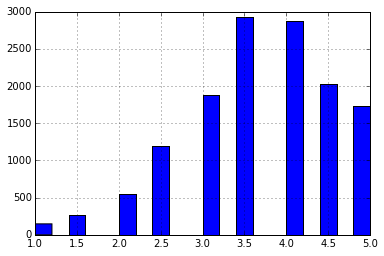

In [70]:
#Exploring variables
#Looking at stars metric to make proper success variable
business3.stars.mean()
business3.categories.describe()
business3.stars.hist(bins=20)
#decided success should be 5 stars (about 10% of sample population)

In [71]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [72]:
business3['success']=0
business3.head()
business3.success[business3.stars==5]=1
business3.success[business3.success==1]


7040    1
7077    1
7112    1
7242    1
7276    1
7277    1
7284    1
7285    1
7288    1
7290    1
7298    1
7324    1
7340    1
7349    1
7354    1
...
61046    1
61056    1
61061    1
61067    1
61075    1
61079    1
61080    1
61091    1
61127    1
61129    1
61132    1
61135    1
61141    1
61155    1
61171    1
Name: success, Length: 1736, dtype: int64

In [73]:
business3.success.value_counts()

0    11865
1     1736
dtype: int64

In [74]:
#reading in review data set
csv2 ='elite_tagged_reviews.csv'
review=pd.read_csv(csv2)
review.head()
review.describe()
review.columns

Index([u'Unnamed: 0', u'business_id', u'date', u'review_id', u'stars', u'text', u'type', u'user_id', u'votes_cool', u'votes_funny', u'votes_useful', u'year', u'user_year', u'is_elite', u'is_elite2'], dtype='object')

In [75]:
#merging business and review data sets
merge=pd.merge(business3, review, on='business_id', how='inner')
merge.head()

,city,business_id,stars_x,categories,success,Unnamed: 0,date,review_id,stars_y,text,type,user_id,votes_cool,votes_funny,votes_useful,year,user_year,is_elite,is_elite2
0,Las Vegas,uzztTCsg3XAKlYqmLO40aw,4,"[u'Books, Mags, Music & Video', u'Arts & Enter...",0,130809,2010-11-19 00:00:00,S412bghmc2IgqOZUiKmwHQ,4,It's not often that you step into a store and ...,review,fPHLPrymsyb6WSFFKoMrTQ,1,0,1,2010,fPHLPrymsyb6WSFFKoMrTQ_2010,True,1
1,Las Vegas,uzztTCsg3XAKlYqmLO40aw,4,"[u'Books, Mags, Music & Video', u'Arts & Enter...",0,130810,2011-09-11 00:00:00,vuhZ51Sz1YQpZ4nuyo_Llg,4,I know that sometimes this subject gives peopl...,review,PV5voYSD43Cn_3gHmxG7DA,2,0,6,2011,PV5voYSD43Cn_3gHmxG7DA_2011,True,1
2,Las Vegas,uzztTCsg3XAKlYqmLO40aw,4,"[u'Books, Mags, Music & Video', u'Arts & Enter...",0,130811,2012-03-27 00:00:00,sow5nIQWjW-h6PeRVyVYFg,5,I went in here looking for a gift for a friend...,review,xQZpIwtb5rI9gVX8MF6YHQ,1,0,0,2012,xQZpIwtb5rI9gVX8MF6YHQ_2012,False,0
3,Las Vegas,uzztTCsg3XAKlYqmLO40aw,4,"[u'Books, Mags, Music & Video', u'Arts & Enter...",0,130812,2012-07-25 00:00:00,CzPtusmCjArWMdaptCUSuw,3,Unique gifts if you have any friends who are i...,review,HkOZSO6pN7u5NG7yjEyvww,2,1,4,2012,HkOZSO6pN7u5NG7yjEyvww_2012,True,1
4,Las Vegas,uzztTCsg3XAKlYqmLO40aw,4,"[u'Books, Mags, Music & Video', u'Arts & Enter...",0,130813,2013-11-21 00:00:00,R5fE5lfy3FdVcHf0iWmRxQ,5,I was a skeptic going in to have my first read...,review,OYQq8sD5Hid4_pb2A88LrA,2,0,2,2013,OYQq8sD5Hid4_pb2A88LrA_2013,False,0


In [76]:
merge.to_csv('reviews_merged.csv')

In [77]:
usr_grps = merge.groupby('user_id')

In [78]:
rev_usrs = usr_grps.agg({'success':'sum','is_elite2':sum})

In [79]:
rev_usrs.head()

,success,is_elite2
user_id,,
--0mI_q_0D1CdU4P_hoImQ,0,0
--20-ljZD5NnAnkwBBC_uQ,0,0
--2QZsyXGz1OhiD4-0FQLQ,0,0
--4fX3LBeXoE88gDTK6TKQ,0,0
--52YqcuRttZN62TCKQdbw,0,0


In [80]:
rev_usrs.success.value_counts()

0     159346
1      12207
2       1458
3        387
4        139
5         60
7         37
6         25
8         13
10         5
9          4
14         4
13         3
17         3
11         2
21         1
12         1
18         1
26         1
dtype: int64

In [81]:
rev_usrs.is_elite2.value_counts()

0     159624
1       3227
2       2039
3       1399
4       1129
5        965
6        718
7        552
8        493
9        394
10       335
11       252
12       234
13       198
14       169
...
191    1
703    1
192    1
194    1
195    1
196    1
324    1
580    1
197    1
454    1
199    1
206    1
336    1
211    1
310    1
Length: 228, dtype: int64

In [82]:
rev_usrs.reset_index(inplace=True)
print rev_usrs.head()

                  user_id  success  is_elite2
0  --0mI_q_0D1CdU4P_hoImQ        0          0
1  --20-ljZD5NnAnkwBBC_uQ        0          0
2  --2QZsyXGz1OhiD4-0FQLQ        0          0
3  --4fX3LBeXoE88gDTK6TKQ        0          0
4  --52YqcuRttZN62TCKQdbw        0          0


In [83]:
rev_usrs.columns = ['user_id','num_success_revs','num_elite_revs']
rev_usrs.head()

,user_id,num_success_revs,num_elite_revs
0,--0mI_q_0D1CdU4P_hoImQ,0,0
1,--20-ljZD5NnAnkwBBC_uQ,0,0
2,--2QZsyXGz1OhiD4-0FQLQ,0,0
3,--4fX3LBeXoE88gDTK6TKQ,0,0
4,--52YqcuRttZN62TCKQdbw,0,0


In [84]:
user_merge=pd.merge(data_user, rev_usrs, on='user_id', how='inner')
user_merge.head()
user_merge.describe()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,compliments_profile,compliments_writer,fans,review_count,votes_cool,votes_funny,votes_useful,num_success_revs,num_elite_revs
count,173697.000000,49703.000000,16128.000000,34926.000000,36492.000000,8412.000000,29565.000000,45120.000000,20553.000000,52809.000000,14403.000000,38350.00000,173697.000000,173697.000000,173697.000000,173697.000000,173697.000000,173697.000000,173697.000000
mean,3.707763,33.733638,8.240513,22.842553,34.445659,6.700309,5.559276,15.516179,16.485769,30.940181,7.768312,15.68133,2.434343,46.615750,54.092581,48.407969,90.647806,0.103537,0.845006
std,0.937356,204.100994,36.738129,135.264160,195.959442,32.591022,29.554058,82.346479,158.369768,229.106057,59.715368,83.77213,14.772144,119.186024,438.002038,397.197015,524.947596,0.427459,9.322814
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.330000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,3.810000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,0.000000,10.000000,2.000000,2.000000,9.000000,0.000000,0.000000
75%,4.270000,11.000000,4.000000,7.000000,11.000000,5.000000,4.000000,7.000000,5.000000,8.000000,4.000000,7.00000,1.000000,36.000000,12.000000,11.000000,39.000000,0.000000,0.000000
max,5.000000,11212.000000,1400.000000,6809.000000,10668.000000,1720.000000,2825.000000,4250.000000,11617.000000,13215.000000,4405.000000,4758.00000,1298.000000,8843.000000,32517.000000,32747.000000,36474.000000,26.000000,1117.000000


In [85]:
data_user.describe()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,compliments_profile,compliments_writer,fans,review_count,votes_cool,votes_funny,votes_useful
count,366715.000000,77966.000000,22080.000000,51725.000000,55896.000000,11556.000000,44919.000000,73508.000000,29017.000000,84007.000000,19857.000000,59562.000000,366715.000000,366715.000000,366715.000000,366715.000000,366715.000000
mean,3.718782,27.281661,7.775453,19.227917,27.831831,6.881187,4.916784,12.739253,15.799221,26.013701,7.351916,13.130150,1.575338,32.214810,33.380991,29.857050,58.979655
std,1.029877,192.101570,78.087533,126.741800,184.772519,78.049617,42.834659,81.000311,345.478048,218.731557,88.115785,83.601751,11.589510,94.837065,335.355325,302.811392,405.049365
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.270000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000
50%,3.860000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,6.000000,1.000000,1.000000,5.000000
75%,4.430000,9.000000,4.000000,6.000000,9.000000,4.000000,3.000000,5.000000,5.000000,7.000000,3.000000,6.000000,1.000000,21.000000,6.000000,6.000000,22.000000
max,5.000000,20407.000000,10473.000000,10254.000000,16817.000000,7805.000000,7373.000000,10033.000000,53641.000000,19019.000000,9955.000000,10167.000000,1298.000000,8843.000000,32517.000000,32747.000000,36474.000000


In [86]:
elite_users = pd.read_csv('elite_users.csv')
elite_users.head()

,Unnamed: 0,user_id,elite_year
0,0,18kPq7GPye-YQ3LyKyAZPw,2005
1,1,18kPq7GPye-YQ3LyKyAZPw,2006
2,2,rpOyqD_893cqmDAtJLbdog,2005
3,3,rpOyqD_893cqmDAtJLbdog,2006
4,4,rpOyqD_893cqmDAtJLbdog,2007


In [87]:
elite_users[['user_id','elite_year']]

,user_id,elite_year
0,18kPq7GPye-YQ3LyKyAZPw,2005
1,18kPq7GPye-YQ3LyKyAZPw,2006
2,rpOyqD_893cqmDAtJLbdog,2005
3,rpOyqD_893cqmDAtJLbdog,2006
4,rpOyqD_893cqmDAtJLbdog,2007
5,rpOyqD_893cqmDAtJLbdog,2008
6,rpOyqD_893cqmDAtJLbdog,2009
7,rpOyqD_893cqmDAtJLbdog,2010
8,rpOyqD_893cqmDAtJLbdog,2011
9,rpOyqD_893cqmDAtJLbdog,2012


In [88]:
ids = list(elite_users.user_id.values)
ids

['18kPq7GPye-YQ3LyKyAZPw',
 '18kPq7GPye-YQ3LyKyAZPw',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 'rpOyqD_893cqmDAtJLbdog',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 '4U9kSBLuBDU391x6bxU-YA',
 'SIBCL7HBkrP4llolm4SC2A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 '8J4IIYcqBlFch8T90N923A',
 'wy6l_zUo7SN0qrvNRWgySw',
 

In [89]:
user_merge['is_elite']=user_merge['user_id'].apply(lambda x: x in ids)

In [90]:
user_merge['is_elite2'] = 0
user_merge['is_elite2']=user_merge.is_elite.map( lambda x: 1 if x==True else 0)
print user_merge.is_elite.value_counts()
print user_merge.is_elite2.value_counts()

False    156583
True      17114
dtype: int64
0    156583
1     17114
dtype: int64


In [91]:
user_merge.to_csv('user_data_tagged.csv')

In [92]:
# putting a setting into pandas that lets you print out the entire
# DataFrame when you use the .head() method
pd.set_option('display.max_columns', None)
user_merge.head()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,compliments_profile,compliments_writer,elite,fans,friends,name,review_count,type,user_id,votes_cool,votes_funny,votes_useful,yelping_since,num_success_revs,num_elite_revs,is_elite,is_elite2
0,3.64,1521,209,561,1032,37,129,589,287,921,110,290,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[u'18kPq7GPye-YQ3LyKyAZPw', u'4U9kSBLuBDU391x6...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,9837,6849,12642,2004-10,0,11,True,1
1,3.59,145,23,122,102,4,19,82,23,86,9,24,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[u'18kPq7GPye-YQ3LyKyAZPw', u'rpOyqD_893cqmDAt...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,727,907,1445,2004-10,0,4,True,1
2,3.80,1,2,NaN,1,NaN,1,1,NaN,2,NaN,2,[2005],3,"[u'rpOyqD_893cqmDAtJLbdog', u'HDQixQ-WZEV0LVPJ...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,11,10,34,2004-10,0,0,True,1
3,3.86,1,NaN,NaN,1,NaN,NaN,NaN,NaN,5,NaN,NaN,[2005],2,"[u'i63u3SdbrLsP4FxiSKP0Zw', u'lGrDfsaWl9IDUcEe...",Mary,59,user,WPOKvkacSKHx_bIG1alFiA,30,25,118,2004-10,0,1,True,1
4,3.55,3,1,8,5,NaN,2,3,1,5,1,2,[],6,"[u'rpOyqD_893cqmDAtJLbdog', u'4U9kSBLuBDU391x6...",Nader,96,user,UTS9XcT14H2ZscRIf0MYHQ,39,40,207,2004-10,0,0,False,0


In [93]:
def converttoarray(x):
    lists = []
    x = x.replace(']','').replace('[','')
    x.strip()
    x_arr = x.split(',')
    x_arr = [y.strip() for y in x_arr]
    for y in x_arr:
        if y=='':
            x_arr.remove(y)
    return x_arr

        
#convert elite column into binary columns with y
user_merge['friends2']=user_merge['friends'].apply(lambda x: converttoarray(x))
user_merge['len_friends']=user_merge['friends2'].apply(lambda x: len(x))

user_merge.head()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,compliments_profile,compliments_writer,elite,fans,friends,name,review_count,type,user_id,votes_cool,votes_funny,votes_useful,yelping_since,num_success_revs,num_elite_revs,is_elite,is_elite2,friends2,len_friends
0,3.64,1521,209,561,1032,37,129,589,287,921,110,290,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[u'18kPq7GPye-YQ3LyKyAZPw', u'4U9kSBLuBDU391x6...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,9837,6849,12642,2004-10,0,11,True,1,"[u'18kPq7GPye-YQ3LyKyAZPw', u'4U9kSBLuBDU391x6...",1904
1,3.59,145,23,122,102,4,19,82,23,86,9,24,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[u'18kPq7GPye-YQ3LyKyAZPw', u'rpOyqD_893cqmDAt...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,727,907,1445,2004-10,0,4,True,1,"[u'18kPq7GPye-YQ3LyKyAZPw', u'rpOyqD_893cqmDAt...",354
2,3.80,1,2,NaN,1,NaN,1,1,NaN,2,NaN,2,[2005],3,"[u'rpOyqD_893cqmDAtJLbdog', u'HDQixQ-WZEV0LVPJ...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,11,10,34,2004-10,0,0,True,1,"[u'rpOyqD_893cqmDAtJLbdog', u'HDQixQ-WZEV0LVPJ...",4
3,3.86,1,NaN,NaN,1,NaN,NaN,NaN,NaN,5,NaN,NaN,[2005],2,"[u'i63u3SdbrLsP4FxiSKP0Zw', u'lGrDfsaWl9IDUcEe...",Mary,59,user,WPOKvkacSKHx_bIG1alFiA,30,25,118,2004-10,0,1,True,1,"[u'i63u3SdbrLsP4FxiSKP0Zw', u'lGrDfsaWl9IDUcEe...",2
4,3.55,3,1,8,5,NaN,2,3,1,5,1,2,[],6,"[u'rpOyqD_893cqmDAtJLbdog', u'4U9kSBLuBDU391x6...",Nader,96,user,UTS9XcT14H2ZscRIf0MYHQ,39,40,207,2004-10,0,0,False,0,"[u'rpOyqD_893cqmDAtJLbdog', u'4U9kSBLuBDU391x6...",52


In [94]:
#delete elite, is_elite,friends,friends2,yelping_since,type,name

user_merge.drop(['elite', 'is_elite','friends','friends2','yelping_since','type','name'],inplace=True,axis=1)
user_merge.head()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,compliments_profile,compliments_writer,fans,review_count,user_id,votes_cool,votes_funny,votes_useful,num_success_revs,num_elite_revs,is_elite2,len_friends
0,3.64,1521,209,561,1032,37,129,589,287,921,110,290,1012,1233,rpOyqD_893cqmDAtJLbdog,9837,6849,12642,0,11,1,1904
1,3.59,145,23,122,102,4,19,82,23,86,9,24,93,442,4U9kSBLuBDU391x6bxU-YA,727,907,1445,0,4,1,354
2,3.80,1,2,NaN,1,NaN,1,1,NaN,2,NaN,2,3,66,SIBCL7HBkrP4llolm4SC2A,11,10,34,0,0,1,4
3,3.86,1,NaN,NaN,1,NaN,NaN,NaN,NaN,5,NaN,NaN,2,59,WPOKvkacSKHx_bIG1alFiA,30,25,118,0,1,1,2
4,3.55,3,1,8,5,NaN,2,3,1,5,1,2,6,96,UTS9XcT14H2ZscRIf0MYHQ,39,40,207,0,0,0,52


In [95]:
user_merge.type.value_counts()

AttributeError: 'DataFrame' object has no attribute 'type'

In [114]:
import pandas
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import ensemble
import numpy
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import  GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt


# including our functions from last week up here for use. 
def cleanup_data(df, cutoffPercent = .01):
    for col in df:
        sizes = df[col].value_counts(normalize = True)
        # get the names of the levels that make up less than 1% of the dataset
        values_to_delete = sizes[sizes<cutoffPercent].index
        df[col].ix[df[col].isin(values_to_delete)] = "Other"
    return df
#

def get_binary_values(data_frame):
    """encodes cateogrical features in Pandas.
    """
    all_columns = pandas.DataFrame( index = data_frame.index)
    for col in data_frame.columns:
        data = pandas.get_dummies(data_frame[col], prefix=col.encode('ascii', 'replace'))
        all_columns = pandas.concat([all_columns, data], axis=1)
    return all_columns
#
def find_zero_var(df):
    """finds columns in the dataframe with zero variance -- ie those
        with the same value in every observation.
    """   
    toKeep = []
    toDelete = []
    for col in df:
        if len(df[col].value_counts()) > 1:
            toKeep.append(col)
        else:
            toDelete.append(col)
        ##
    return {'toKeep':toKeep, 'toDelete':toDelete} 
##
def find_perfect_corr(df):
    """finds columns that are eother positively or negatively perfectly correlated (with correlations of +1 or -1), and creates a dict 
        that includes which columns to drop so that each remaining column
        is independent
    """  
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  numpy.tril(corrMatrix.values, k = -1)
    already_in = set()
    result = []
    for col in corrMatrix:
        perfect_corr = corrMatrix[col][abs(numpy.round(corrMatrix[col],10)) == 1.00].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    toRemove = []
    for item in result:
        toRemove.append(item[1:(len(item)+1)])
 #   print toRemove
   # toRemove = sum(toRemove, [])
    return {'corrGroupings':result, 'toRemove':toRemove}
###

In [98]:
user_merge.head()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,compliments_profile,compliments_writer,fans,review_count,user_id,votes_cool,votes_funny,votes_useful,num_success_revs,num_elite_revs,is_elite2,len_friends
0,3.64,1521,209,561,1032,37,129,589,287,921,110,290,1012,1233,rpOyqD_893cqmDAtJLbdog,9837,6849,12642,0,11,1,1904
1,3.59,145,23,122,102,4,19,82,23,86,9,24,93,442,4U9kSBLuBDU391x6bxU-YA,727,907,1445,0,4,1,354
2,3.80,1,2,NaN,1,NaN,1,1,NaN,2,NaN,2,3,66,SIBCL7HBkrP4llolm4SC2A,11,10,34,0,0,1,4
3,3.86,1,NaN,NaN,1,NaN,NaN,NaN,NaN,5,NaN,NaN,2,59,WPOKvkacSKHx_bIG1alFiA,30,25,118,0,1,1,2
4,3.55,3,1,8,5,NaN,2,3,1,5,1,2,6,96,UTS9XcT14H2ZscRIf0MYHQ,39,40,207,0,0,0,52


In [99]:
#############
## repeating the same preprocessing from the previous lesson
############

## splitting out the explanatory features 
explanatory_features = [col for col in user_merge.columns if col not in ['user_id', 'is_elite2']]
explanatory_df = user_merge[explanatory_features]

# dropping rows with no data.
explanatory_df.dropna(how='all', inplace = True) 

# extracting column names 
explanatory_colnames = explanatory_df.columns

print explanatory_colnames

Index([u'average_stars', u'compliments_cool', u'compliments_cute', u'compliments_funny', u'compliments_hot', u'compliments_list', u'compliments_more', u'compliments_note', u'compliments_photos', u'compliments_plain', u'compliments_profile', u'compliments_writer', u'fans', u'review_count', u'votes_cool', u'votes_funny', u'votes_useful', u'num_success_revs', u'num_elite_revs', u'len_friends'], dtype='object')


/Users/tdong/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame


In [100]:
## doing the same for response
response_series = user_merge.is_elite2
response_series.dropna(how='all', inplace = True) 

## seeing which explanatory feature rows got removed.  Looks like none.
removed = response_series.index[~response_series.index.isin(explanatory_df.index)]
print removed


Int64Index([], dtype='int64')


In [101]:
### now, let's seperate the numeric explanatory data from the string data
string_features = explanatory_df.ix[:, explanatory_df.dtypes == 'object']
numeric_features = explanatory_df.ix[:, explanatory_df.dtypes != 'object']

print string_features
print numeric_features

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[173697 rows x 0 columns]
        average_stars  compliments_cool  compliments_cute  compliments_funny  \
0                3.64              1521               209                561   
1                3.59               145                23                122   
2                3.80                 1                 2                NaN   
3                3.86                 1               NaN                NaN   
4                3.55                 3                 1                  8   
5                4.30                 3               NaN     

In [102]:
#no string features so nothing to binarize
## imputing features
imputer_object = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer_object.fit(numeric_features)
numeric_features = pandas.DataFrame(imputer_object.transform(numeric_features), columns = numeric_features.columns)

## pulling together numeric and encoded data.
explanatory_df = numeric_features
explanatory_df.head()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,compliments_profile,compliments_writer,fans,review_count,votes_cool,votes_funny,votes_useful,num_success_revs,num_elite_revs,len_friends
0,3.64,1521,209,561,1032,37,129,589,287,921,110,290,1012,1233,9837,6849,12642,0,11,1904
1,3.59,145,23,122,102,4,19,82,23,86,9,24,93,442,727,907,1445,0,4,354
2,3.80,1,2,2,1,2,1,1,2,2,2,2,3,66,11,10,34,0,0,4
3,3.86,1,2,2,1,2,2,2,2,5,2,2,2,59,30,25,118,0,1,2
4,3.55,3,1,8,5,2,2,3,1,5,1,2,6,96,39,40,207,0,0,52


In [103]:
#now, let's find features with no variance 
no_variation = find_zero_var(explanatory_df)
print no_variation
#looks like there is nothing to delete
explanatory_df.drop(no_variation['toDelete'], inplace = True)

{'toKeep': ['average_stars', 'compliments_cool', 'compliments_cute', 'compliments_funny', 'compliments_hot', 'compliments_list', 'compliments_more', 'compliments_note', 'compliments_photos', 'compliments_plain', 'compliments_profile', 'compliments_writer', 'fans', 'review_count', 'votes_cool', 'votes_funny', 'votes_useful', 'num_success_revs', 'num_elite_revs', 'len_friends'], 'toDelete': []}


In [104]:
# deleting perfect correlation
no_correlation = find_perfect_corr(explanatory_df)
print no_correlation
explanatory_df.drop(no_correlation['toRemove'], 1, inplace = True)

TypeError: an integer is required

In [106]:
explanatory_df.dtypes

average_stars          float64
compliments_cool       float64
compliments_cute       float64
compliments_funny      float64
compliments_hot        float64
compliments_list       float64
compliments_more       float64
compliments_note       float64
compliments_photos     float64
compliments_plain      float64
compliments_profile    float64
compliments_writer     float64
fans                   float64
review_count           float64
votes_cool             float64
votes_funny            float64
votes_useful           float64
num_success_revs       float64
num_elite_revs         float64
len_friends            float64
dtype: object

In [109]:
cols_to_corr=explanatory_df.drop('average_stars',axis=1)
columns = cols_to_corr.columns
cols_to_corr[columns] = cols_to_corr[columns].astype(int)
cols_to_corr.dtypes

compliments_cool       int64
compliments_cute       int64
compliments_funny      int64
compliments_hot        int64
compliments_list       int64
compliments_more       int64
compliments_note       int64
compliments_photos     int64
compliments_plain      int64
compliments_profile    int64
compliments_writer     int64
fans                   int64
review_count           int64
votes_cool             int64
votes_funny            int64
votes_useful           int64
num_success_revs       int64
num_elite_revs         int64
len_friends            int64
dtype: object

In [115]:
#rerun perfect correlation without the average starts column
no_correlation = find_perfect_corr(cols_to_corr)
print no_correlation
explanatory_df.drop(no_correlation['toRemove'], 1, inplace = True)

{'corrGroupings': [], 'toRemove': []}


In [116]:
# scaling data
scaler = preprocessing.StandardScaler()
scaler.fit(explanatory_df)
explanatory_df = pandas.DataFrame(scaler.transform(explanatory_df), columns = explanatory_df.columns)
print explanatory_df.head()

   average_stars  compliments_cool  compliments_cute  compliments_funny  \
0      -0.072291         13.712789         18.203054           9.061669   
1      -0.125633          1.210319          1.800773           1.891504   
2       0.098402         -0.098079         -0.051098          -0.068450   
3       0.162412         -0.098079         -0.051098          -0.068450   
4      -0.168306         -0.079906         -0.139282           0.029548   

   compliments_hot  compliments_list  compliments_more  compliments_note  \
0        11.268924          4.801227         10.304492         13.766262   
1         1.018371          0.244721          1.336562          1.804606   
2        -0.094861         -0.031431         -0.130918         -0.106428   
3        -0.094861         -0.031431         -0.049391         -0.082835   
4        -0.050772         -0.031431         -0.049391         -0.059242   

   compliments_photos  compliments_plain  compliments_profile  \
0            5.181147      

In [117]:
#################
## RANDOM FORESTS
#################

# creating a random forest object.
## these are the default values of the classifier
rf = ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, min_density=None, compute_importances=None)

# I'm going to change this a bit.
rf = ensemble.RandomForestClassifier(n_estimators= 500)

# let's compute ROC AUC of the random forest. 
roc_scores_rf = cross_val_score(rf, explanatory_df, response_series, cv=10, scoring='roc_auc', n_jobs = -1)
print roc_scores_rf


KeyboardInterrupt: 

In [ ]:
# let's do the same for the decision tree
roc_score_tree = cross_val_score(tree.DecisionTreeClassifier(), explanatory_df, response_series, cv=10, scoring='roc_auc', n_jobs = -1)

## let's compare the mean ROC AUC
print roc_scores_rf.mean()
print roc_score_tree.mean()
## RF does really well, eh? 

## perform grid search to find the optimal number of trees

trees_range = range(10, 550, 10)
param_grid = dict(n_estimators = trees_range)

grid = GridSearchCV(rf, param_grid, cv=10, scoring='roc_auc', n_jobs = -1)
grid.fit(explanatory_df, response_series)

# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]

# Plot the results of the grid search
plt.figure()
plt.plot(trees_range, grid_mean_scores)
# where do you think we should put the tree cut-off at?

# let's pull out the best estimator and print its ROC AUC
best_rf_est = grid.best_estimator_
# how many trees did the best estiator have? 
print best_rf_est.n_estimators
# how accurate was the best estimator?
print grid.best_score_
## did accuracy improve? 
